In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
model = nn.Sequential(
    nn.Conv2d(1,32,3),
    nn.ReLU(),
    nn.MaxPool2d(5),
    nn.Conv2d(1,64,3),
    nn.ReLU(),
    nn.MaxPool2d(4),
    nn.Conv2d(1,128,3),
    nn.ReLU(),
    nn.MaxPool2d(5),
    nn.Conv2d(1,256,3),
    nn.ReLU(),
    nn.MaxPool2d(5),
    nn.Flatten(),
    nn.Linear(256,2),
    nn.Softmax2d()
)

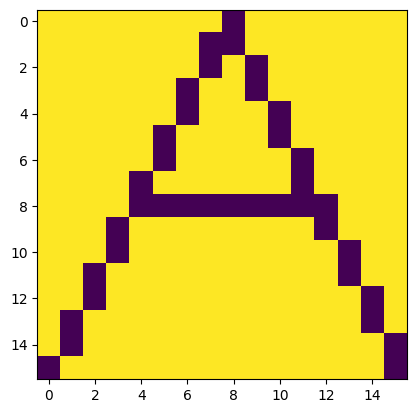

In [34]:
image_input = Image.open("/home/alejoba1097/Alejandro Barrientos/Desktop/A.png")
img_array = torch.tensor(np.array(image_input.convert('1')).astype(int))
img_array = img_array.reshape(1, 16, 16).float()
plt.imshow(img_array[0])
plt.show()

In [159]:
from torchvision.transforms.functional import rotate
img_array2 = rotate(img_array, 180)

In [25]:
model = nn.Sequential(
    nn.Conv2d(1, 16, 3),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(16, 32, 3),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(-3),
    nn.Linear(128, 2),
    nn.Softmax(0)
)

In [162]:
loss_fn = nn.CrossEntropyLoss()

opt  = torch.optim.Adam(model.parameters(), lr = 0.001)

In [167]:
for i in range(10):
    for j in range(2):
        if j == 0:
            outputs = model(img_array)
        else:
            outputs = model(img_array2)
        loss = loss_fn(outputs, torch.tensor([1., 0.]))
        loss.backward()
        opt.step()

    print(loss)

tensor(0.3133, grad_fn=<DivBackward1>)
tensor(0.3133, grad_fn=<DivBackward1>)
tensor(0.3133, grad_fn=<DivBackward1>)
tensor(0.3133, grad_fn=<DivBackward1>)
tensor(0.3133, grad_fn=<DivBackward1>)
tensor(0.3133, grad_fn=<DivBackward1>)
tensor(0.3133, grad_fn=<DivBackward1>)
tensor(0.3133, grad_fn=<DivBackward1>)
tensor(0.3133, grad_fn=<DivBackward1>)
tensor(0.3133, grad_fn=<DivBackward1>)


# Use MNIST dataset

In [64]:
train_data = torchvision.datasets.MNIST("./", train = True, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_data, batch_size = 16, shuffle = True, num_workers = 2)

test_data = torchvision.datasets.MNIST("./", train = False, download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 16, shuffle = True, num_workers = 2)

In [40]:
model = nn.Sequential(
    nn.Conv2d(1, 16, 3),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(16, 32, 3),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(-3),
    nn.Linear(800, 10),
    nn.Softmax(0)
)

In [41]:
loss_fn = nn.CrossEntropyLoss()

opt  = torch.optim.Adam(model.parameters(), lr = 0.001)

In [45]:
for i in range(25):
    for i, data in enumerate(train_loader, 0):
        inputs, label = data
        opt.zero_grad()

        outputs = model(inputs)

        loss = loss_fn(outputs, label)
        loss.backward()
        opt.step()

    print(loss)

tensor(1.9480, grad_fn=<NllLossBackward0>)
tensor(1.8313, grad_fn=<NllLossBackward0>)
tensor(1.8898, grad_fn=<NllLossBackward0>)
tensor(1.8311, grad_fn=<NllLossBackward0>)
tensor(1.9046, grad_fn=<NllLossBackward0>)
tensor(1.8866, grad_fn=<NllLossBackward0>)
tensor(1.8306, grad_fn=<NllLossBackward0>)
tensor(1.8274, grad_fn=<NllLossBackward0>)
tensor(1.8296, grad_fn=<NllLossBackward0>)
tensor(1.8877, grad_fn=<NllLossBackward0>)
tensor(1.8889, grad_fn=<NllLossBackward0>)
tensor(1.8932, grad_fn=<NllLossBackward0>)
tensor(1.8280, grad_fn=<NllLossBackward0>)
tensor(1.9507, grad_fn=<NllLossBackward0>)
tensor(1.8871, grad_fn=<NllLossBackward0>)
tensor(1.9441, grad_fn=<NllLossBackward0>)
tensor(1.8907, grad_fn=<NllLossBackward0>)
tensor(1.8886, grad_fn=<NllLossBackward0>)
tensor(1.8851, grad_fn=<NllLossBackward0>)
tensor(1.8255, grad_fn=<NllLossBackward0>)
tensor(1.8867, grad_fn=<NllLossBackward0>)
tensor(1.8338, grad_fn=<NllLossBackward0>)
tensor(1.8275, grad_fn=<NllLossBackward0>)
tensor(1.94

In [47]:
torch.save(model.state_dict(), './mnist_model.pth')

In [71]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

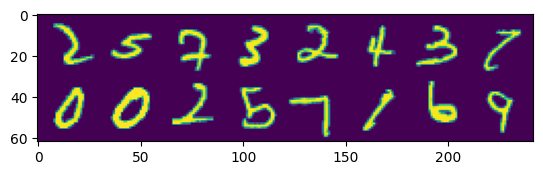

In [75]:
plt.imshow(torchvision.utils.make_grid(images)[0])

In [93]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        break

print(correct / total)

0.625


In [99]:
# prepare to count predictions for each class
correct_pred = {i : 0 for i in range(10)}
total_pred = {i : 0 for i in range(10)}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)

        _, predictions = torch.max(outputs, 1)

        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[label.item()] += 1
            total_pred[label.item()] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = float(correct_count) / total_pred[classname]
    print(classname, "", accuracy)

0  0.9102040816326531
1  0.8546255506607929
2  0.874031007751938
3  0.9178217821782179
4  0.8859470468431772
5  0.9069506726457399
6  0.9008350730688935
7  0.8657587548638133
8  0.8809034907597536
9  0.8404360753221011
